In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

batch_size=50
epochs=150
lr=0.001



In [9]:
X=np.load('Xtrain1.npy')
y=np.load('Ytrain1.npy')


X, X_model_eval, y, y_model_eval = train_test_split(X, y, test_size=0.2)


train_images = (X).astype('float32')/255.0
train_labels = keras.utils.to_categorical(y,2)

print(train_images.shape)

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

(2226, 2304)


In [3]:
model_MLP = Sequential()

model_MLP.add(Dense(16,activation = 'relu',input_dim = 2304))
model_MLP.add(Dense(8,activation = 'relu'))
model_MLP.add(Dense(2,activation = 'softmax'))
# CNN
model_MLP.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model_MLP.summary()

c:\Users\j040c\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        36,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,034 (144.66 KB)

 Trainable params: 37,034 (144.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6360 - loss: 0.6560 - val_accuracy: 0.6457 - val_loss: 0.6500
Epoch 2/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6504 - loss: 0.6472 - val_accuracy: 0.6457 - val_loss: 0.6501
Epoch 3/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6593 - loss: 0.6418 - val_accuracy: 0.6457 - val_loss: 0.6500
Epoch 4/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6491 - loss: 0.6481 - val_accuracy: 0.6457 - val_loss: 0.6500
Epoch 5/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6424 - loss: 0.6521 - val_accuracy: 0.6457 - val_loss: 0.6500
Epoch 6/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6547 - loss: 0.6446 - val_accuracy: 0.6457 - val_loss: 0.6500
Epoch 7/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6306 - loss: 0.6593 - val_accuracy: 0.6457 - val_loss: 0.6500
Epoch 8/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6394 - loss: 0.6539 - val_accuracy: 0.6457 - 

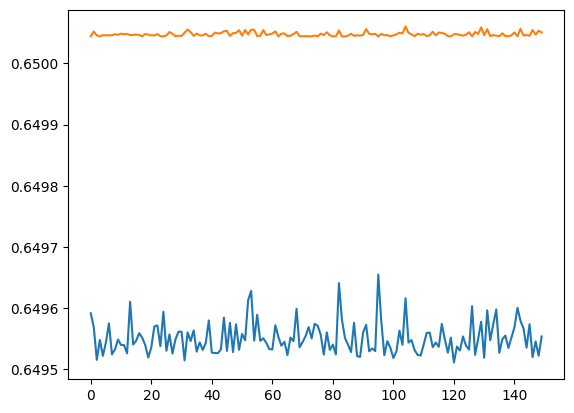

([<matplotlib.lines.Line2D at 0x1bbd6fe53f0>], None)

In [7]:
adam = keras.optimizers.Adam(learning_rate = lr)
model_MLP.compile(optimizer = adam,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])



#MLP without early stopping
history = model_MLP.fit(x = X_train,y=y_train,epochs = epochs,batch_size=batch_size,validation_data = (X_val,y_val),verbose = 1)


####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['loss'], label='train'),
plt.plot(history.history['val_loss'], label='train'), plt.show()


In [45]:
test_images = (X_model_eval).astype('float32')/255.0
results_MLP = np.argmax(model_MLP.predict(test_images),1)
print('MLP accuracy:', np.mean(results_MLP == y_model_eval))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MLP accuracy: 0.5547576301615799
